# Understanding and Predicting IBM Employee Attrition

# Discover

## Import Packages

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

## Obtain data

In [56]:
ibm = pd.read_csv("https://raw.githubusercontent.com/min-tee/HR-Analytics/main/WA_Fn-UseC_-HR-Employee-Attrition.csv")
ibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Clean data

In [57]:
# dimension of data set
ibm.shape

(1470, 35)

In [58]:
# see if there are any missing values
ibm.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [59]:
# confirmation check for any missing or null values
ibm.isnull().values.any()

False

In [60]:
# see records and data types
ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [61]:
# check for duplicates
ibm.duplicated().sum()

0

## Explore data

**Numerical Features**

In [62]:
# statistical summary
ibm.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [63]:
# overview of employees who left vs remained at the compnay
attr_summary = ibm.groupby('Attrition')
attr_summary.mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.645580,15.231144,3.153285,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,15.097046,3.156118,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


Glancing quickly, it appears turnover rate is affected by job level, monthly income, total working years, years at company, current job and time with current manager. 

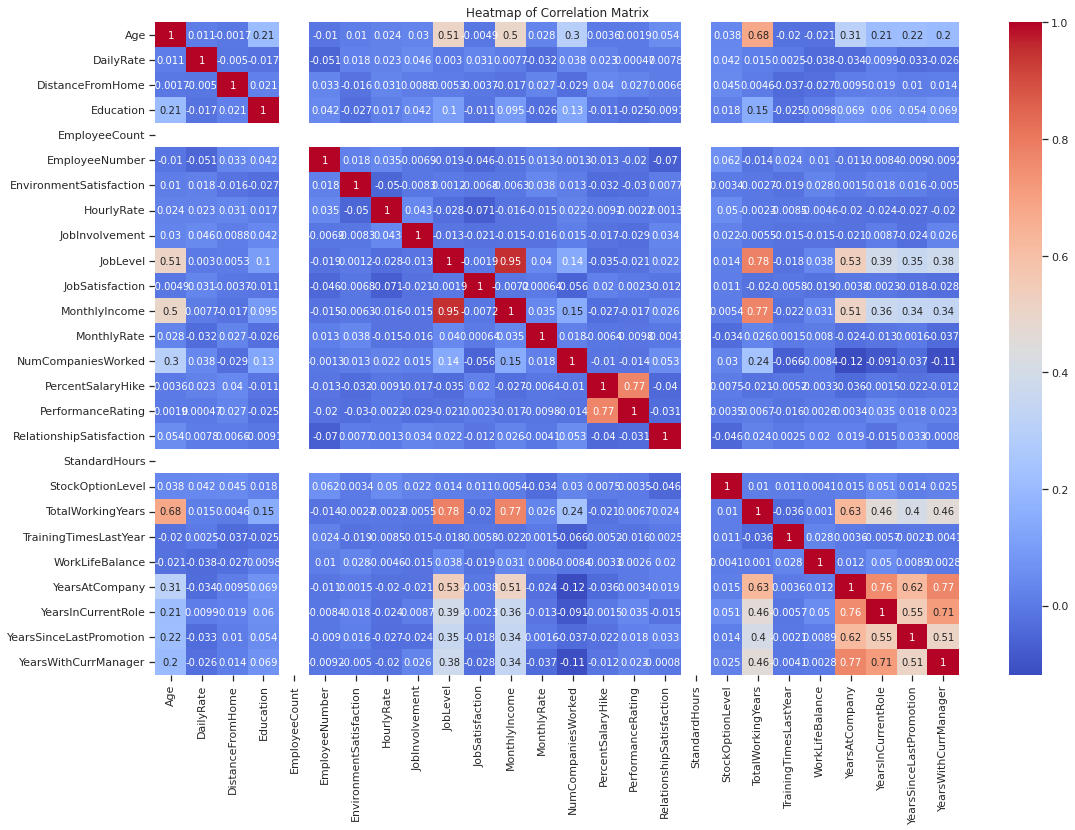

In [64]:
# correlation matrix
cm = ibm.corr()
sns.set_style('ticks')
f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.savefig("correlation matrix")
plt.show()

Some features are highly correlated(multicollinearity). Those may need to be removed later during modeling due to possible model instability.

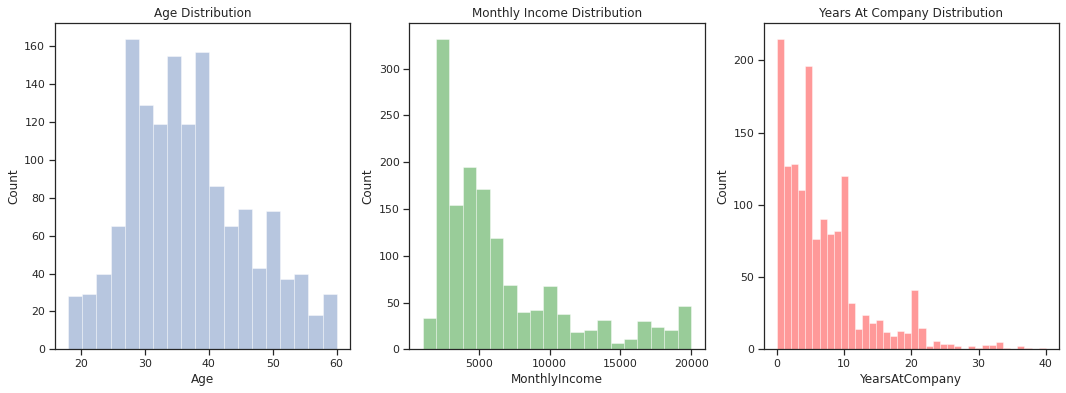

In [65]:
# distribution
# set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize = (18,6))
# age
sns.distplot(ibm['Age'], kde=False, ax = axes[0]).set_title('Age Distribution')
axes[0].set_ylabel('Count')
# monthly income
sns.distplot(ibm['MonthlyIncome'], kde=False, color = 'green', ax = axes[1]).set_title('Monthly Income Distribution')
axes[1].set_ylabel('Count')
# years at company
sns.distplot(ibm['YearsAtCompany'], kde=False, color = 'red', ax = axes[2]).set_title('Years At Company Distribution')
axes[2].set_ylabel('Count')
plt.savefig("distributions")
plt.show()



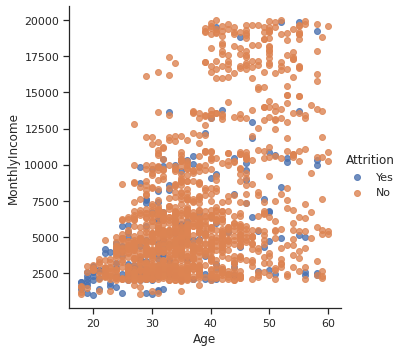

In [66]:
# Monthly Income vs Years at Company
sns.lmplot(x='Age',y='MonthlyIncome', data = ibm, 
           fit_reg=False, hue = 'Attrition')
plt.savefig("vsmonthlyincome")
plt.show()

Generally, attrition is higher among employees who make less and early in the career. 

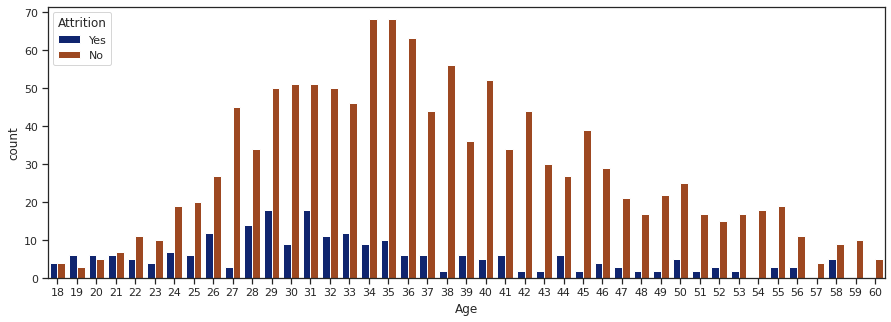

In [67]:
# breakdown attrition by age
plt.subplots(figsize = (15,5))
sns.countplot(x='Age', hue = 'Attrition', data = ibm, palette='dark')
plt.savefig("attrition_age")
plt.show()

Attrition is high at age range 28-31.

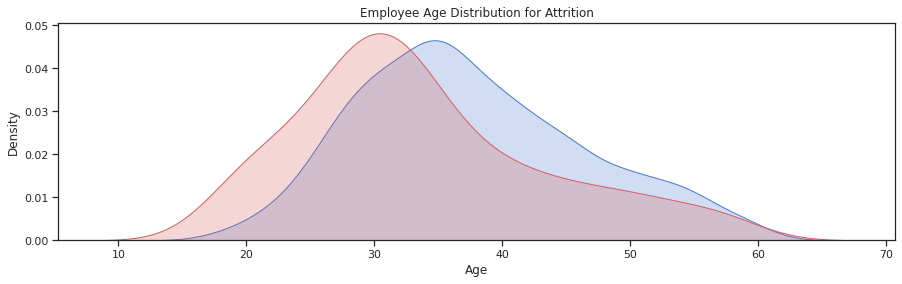

In [68]:
# Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(ibm.loc[(ibm['Attrition'] == 'No'),'Age'] , color='b',shade=True, label='Attrition')
ax=sns.kdeplot(ibm.loc[(ibm['Attrition'] == 'Yes'),'Age'] , color='r',shade=True, label='No Attrition')
plt.title('Employee Age Distribution for Attrition')
plt.savefig("kde_age")
plt.show()

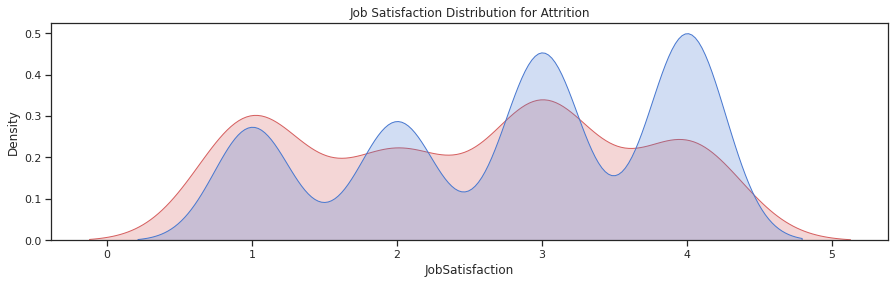

In [69]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(ibm.loc[(ibm['Attrition'] == 'Yes'),'JobSatisfaction'] , color='r',shade=True, label='Attrition')
ax=sns.kdeplot(ibm.loc[(ibm['Attrition'] == 'No'),'JobSatisfaction'] , color='b',shade=True, label='No Attrition')
plt.title('Job Satisfaction Distribution for Attrition')
plt.show()

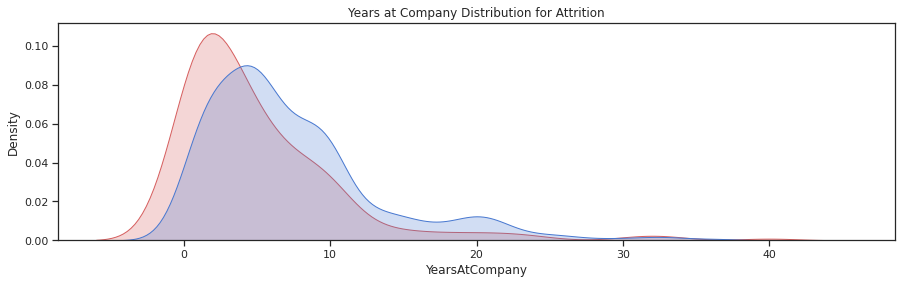

In [70]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(ibm.loc[(ibm['Attrition'] == 'Yes'),'YearsAtCompany'] , color='r',shade=True, label='Attrition')
ax=sns.kdeplot(ibm.loc[(ibm['Attrition'] == 'No'),'YearsAtCompany'] , color='b',shade=True, label='No Attrition')
plt.title('Years at Company Distribution for Attrition')
plt.show()

**Categorical Features**

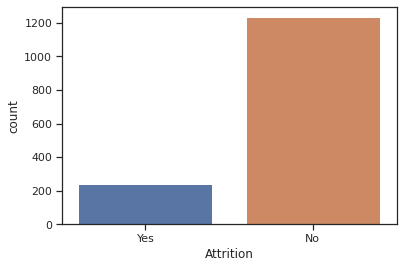

In [71]:
# bar plot for attrition
sns.countplot(ibm['Attrition'])
plt.savefig("imbalanced_data")
plt.show()

In [72]:
# attrition rate 
attr_rate = ibm.Attrition.value_counts()/1470
attr_rate

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

In [73]:
# check unique values for categorical variables
for var in ibm.columns:
  if ibm[var].dtype == object:
    print(str(var) + ':' + str(ibm[var].unique()))
    print(ibm[var].value_counts())
    print('------------------------------------------------------------------------------')

Attrition:['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
------------------------------------------------------------------------------
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
------------------------------------------------------------------------------
Department:['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
------------------------------------------------------------------------------
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
------------------------------------------

In [74]:
# attrition by departments
left = ibm[ibm['Attrition']=='Yes']
left = pd.DataFrame(left.Department.value_counts()).reset_index()
total = pd.DataFrame(ibm.Department.value_counts()).reset_index()
df_merge = pd.merge(left, total, how='inner', on='index')
df_merge = df_merge.rename(columns={"Department_x":'left', "Department_y":'total', "index":'Department' })
df_merge['stayed'] = df_merge['total']-df_merge['left']
df_merge

,Department,left,total,stayed
0,Research & Development,133,961,828
1,Sales,92,446,354
2,Human Resources,12,63,51


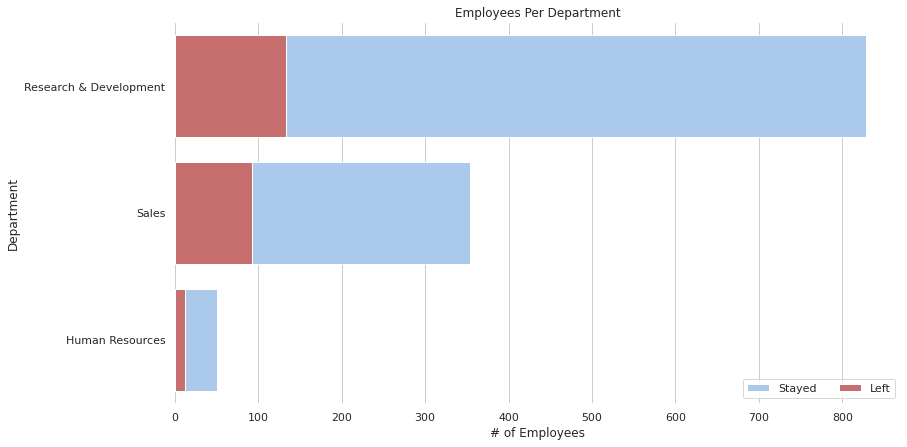

In [75]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the total employee per department
sns.set_color_codes("pastel")
sns.barplot(x="stayed", y='Department', data=df_merge,
            label="Stayed", color="b")

# Plot the total left per department
sns.set_color_codes("muted")
sns.barplot(x="left", y="Department", data=df_merge,
            label="Left", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Department", title='Employees Per Department',
       xlabel="# of Employees")
sns.despine(left=True, bottom=True)

Sales have higher turnover by proportion(20%)

# Develop

In [76]:
# Import libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, roc_auc_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

## One-hot encoding

In [77]:
cat_dtype = ['Attrition','BusinessTravel','Department',
             'EducationField','JobRole','MaritalStatus',
             'OverTime','Over18','Gender']
num_dtype = ['Age', 'DailyRate','DistanceFromHome', 'EnvironmentSatisfaction',
             'HourlyRate','JobInvolvement', 'JobSatisfaction','MonthlyIncome',
             'MonthlyRate','NumCompaniesWorked','PercentSalaryHike', 
             'StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear', 
             'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole', 
             'YearsSinceLastPromotion','YearsWithCurrManager','StandardHours',
             'EmployeeCount','EmployeeNumber','Education','PerformanceRating',
             'RelationshipSatisfaction','JobLevel']
num_ibm = ibm[num_dtype]
# one-hot encode catergorical varaibles, drop_first to get k-1 dummies minus reference column which will be represented uniquely 
cat_ibm = pd.get_dummies(ibm[cat_dtype], drop_first=True) 

In [78]:
ibm_new = pd.concat([num_ibm, cat_ibm], axis = 1)
ibm_new = ibm_new.rename(columns={'Attrition_Yes':'Attrition'})
firstcol = ibm_new['Attrition']
ibm_new.drop(labels=['Attrition'], axis=1, inplace=True)
ibm_new.insert(47,'Attrition',firstcol)
ibm_new

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,StandardHours,EmployeeCount,EmployeeNumber,Education,PerformanceRating,RelationshipSatisfaction,JobLevel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Gender_Male,Attrition
0,41,1102,1,2,94,3,4,5993,19479,8,11,0,8,0,1,6,4,0,5,80,1,1,2,3,1,2,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1
1,49,279,8,3,61,2,2,5130,24907,1,23,1,10,3,3,10,7,1,7,80,1,2,1,4,4,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
2,37,1373,2,4,92,2,3,2090,2396,6,15,0,7,3,3,0,0,0,0,80,1,4,2,3,2,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,1
3,33,1392,3,4,56,3,3,2909,23159,1,11,0,8,3,3,8,7,3,0,80,1,5,4,3,3,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
4,27,591,2,1,40,3,2,3468,16632,9,12,1,6,3,3,2,2,2,2,80,1,7,1,3,4,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,3,41,4,4,2571,12290,4,17,1,17,3,3,5,2,0,3,80,1,2061,2,3,3,2,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1466,39,613,6,4,42,2,1,9991,21457,4,15,1,9,5,3,7,7,1,7,80,1,2062,1,3,1,3,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1467,27,155,4,2,87,4,2,6142,5174,1,20,1,6,0,3,6,2,0,3,80,1,2064,3,4,2,2,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0
1468,49,1023,2,4,63,2,2,5390,13243,2,14,0,17,3,2,9,6,0,8,80,1,2065,3,3,4,2,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0


In [79]:
# inspect target variable by percentage
ibm.Attrition.value_counts()/1470

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

## Split the dataset into the Training and Test set

In [80]:
y= ibm_new['Attrition']
X = ibm_new.drop(columns='Attrition')

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0 ) 
print("Training shape:",  X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Training shape: (1176, 47) (1176,)
Test shape: (294, 47) (294,)


## Baseline Models with Original Sample

**Logistic Regression**

In [82]:
# create a logistic regression classifier
log_reg = LogisticRegression(random_state=0)
# train the model using the training sets
log_reg.fit(X_train, y_train)
# predict using test sets
y_pred = log_reg.predict(X_test)
# calculate accuracy, precision, recall, F-1 score, cross validation, auc score
print("Accuracy=%2.2f"%accuracy_score(y_test, y_pred))
print("="*70)
print(classification_report(y_test, y_pred))
print("="*70)
log_f1 = f1_score(y_test, y_pred, average='weighted')
cvscore = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='f1')
print("CV=%2.2f"%cvscore.mean())
log_reg_auc = roc_auc_score(y_test, log_reg.predict(X_test))
print("Logistic Regression AUC = %2.2f" % log_reg_auc)

Accuracy=0.83
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       245
           1       0.00      0.00      0.00        49

    accuracy                           0.83       294
   macro avg       0.42      0.50      0.45       294
weighted avg       0.69      0.83      0.76       294

CV=0.04
Logistic Regression AUC = 0.50


**Random Forest**

In [83]:
rand_fr = RandomForestClassifier(random_state=0)
rand_fr.fit(X_train, y_train)
y_pred = rand_fr.predict(X_test)
print("Accuracy=%2.2f"%accuracy_score(y_test, y_pred))
print("="*70)
print(classification_report(y_test, y_pred))
print("="*70)
rf_f1 = f1_score(y_test, y_pred, average='weighted')
cvscore = cross_val_score(rand_fr, X_train, y_train, cv=5, scoring='f1')
print("CV=%2.2f"%cvscore.mean())
rand_fr_auc = roc_auc_score(y_test, rand_fr.predict(X_test))
print("Random Forest AUC = %2.2f" % rand_fr_auc)

Accuracy=0.85
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       245
           1       0.80      0.16      0.27        49

    accuracy                           0.85       294
   macro avg       0.83      0.58      0.59       294
weighted avg       0.85      0.85      0.81       294

CV=0.22
Random Forest AUC = 0.58


**KNN**

In [84]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy = %2.2f" %accuracy_score(y_test, y_pred))
print("="*70)
print(classification_report(y_test, y_pred))
print("="*70)
knn_f1 = f1_score(y_test, y_pred, average='weighted')
cvscore = cross_val_score(knn, X_train, y_train, cv=5, scoring='f1')
print("CV=%2.2f"%cvscore.mean())
knn_auc = roc_auc_score(y_test, knn.predict(X_test))
print("KNN AUC = %2.2f" % knn_auc)


Accuracy = 0.80
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       245
           1       0.08      0.02      0.03        49

    accuracy                           0.80       294
   macro avg       0.46      0.49      0.46       294
weighted avg       0.71      0.80      0.75       294

CV=0.12
KNN AUC = 0.49


**SVM**

In [85]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy=%2.2f" %accuracy_score(y_test, y_pred))
print("="*70)
print(classification_report(y_test, y_pred))
print('='*70)
svm_f1 = f1_score(y_test, y_pred, average='weighted')
cvscore = cross_val_score(svm, X_train, y_train, cv=5, scoring='f1')
print("CV=%2.2f"%cvscore.mean())
svm_auc = roc_auc_score(y_test, svm.predict(X_test))
print("SVM AUC = %2.2f" % svm_auc)

Accuracy=0.83
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       245
           1       0.00      0.00      0.00        49

    accuracy                           0.83       294
   macro avg       0.42      0.50      0.45       294
weighted avg       0.69      0.83      0.76       294

CV=0.00
SVM AUC = 0.50


In [86]:
# Create table for baseline scores
baseline_scores = {
    'Logistic Regression' : [log_reg_auc, round(log_f1,2) ],
    'Random Forest' : [round(rand_fr_auc,2), round(rf_f1,2)],
    'KNN' : [round(knn_auc,2), round(knn_f1,2)],
    'SVM' : [svm_auc, round(svm_f1,2)]
}
baseline_df = pd.DataFrame(baseline_scores, index=['AUC', 'F1-score'])
baseline_df

,Logistic Regression,Random Forest,KNN,SVM
AUC,0.50,0.58,0.49,0.50
F1-score,0.76,0.81,0.75,0.76


**ROC Graph**

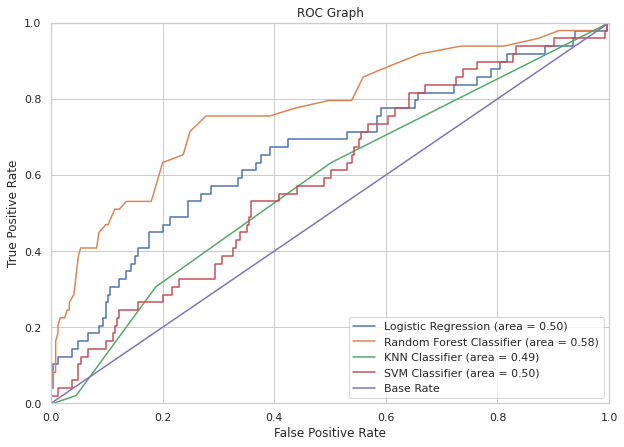

In [87]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rand_fr.predict_proba(X_test)[:,1])
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm.predict_proba(X_test)[:,1])

plt.figure(figsize=(10,7))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % log_reg_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rand_fr_auc)

# Plot KNN ROC
plt.plot(knn_fpr, knn_tpr, label='KNN Classifier (area = %0.2f)' % knn_auc)

# Plot SVM ROC
plt.plot(svm_fpr, svm_tpr, label='SVM Classifier (area = %0.2f)' % svm_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.savefig("baseline_roc")
plt.show()

# Improve Model Performance

## Feature Selection

In [88]:
# remove variables which lacks variability
ibm_fs = ibm.drop(['StandardHours','EmployeeCount','EmployeeNumber','Over18'], axis = 1)

## Train Test Split & Feature Scale Numerical Variables

In [89]:
# separate out numerical and categorical features
cat_fsdtype = ['Attrition','BusinessTravel','Department','EducationField',
               'JobRole','MaritalStatus','OverTime','Gender']
num_fsdtype = ['Age','DailyRate', 'EnvironmentSatisfaction','HourlyRate', 
               'JobInvolvement','JobSatisfaction','MonthlyIncome','MonthlyRate',
               'NumCompaniesWorked','PercentSalaryHike','StockOptionLevel', 
               'TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany', 
               'YearsInCurrentRole','YearsSinceLastPromotion',
               'YearsWithCurrManager','JobLevel','Education',
               'PerformanceRating','RelationshipSatisfaction']
num_fsibm = ibm[num_fsdtype]
cat_fsibm = pd.get_dummies(ibm_fs[cat_fsdtype], drop_first=True) 

In [90]:
# concatenate and rearrange features
ibm_fs = pd.concat([num_fsibm, cat_fsibm], axis = 1)
ibm_fs= ibm_fs.rename(columns={'Attrition_Yes':'Attrition'})
firstcol = ibm_fs['Attrition']
ibm_fs.drop(labels=['Attrition'], axis=1, inplace=True)
ibm_fs.insert(42,'Attrition',firstcol)
ibm_fs

,Age,DailyRate,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,JobLevel,Education,PerformanceRating,RelationshipSatisfaction,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Gender_Male,Attrition
0,41,1102,2,94,3,4,5993,19479,8,11,0,0,1,6,4,0,5,2,2,3,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1
1,49,279,3,61,2,2,5130,24907,1,23,1,3,3,10,7,1,7,2,1,4,4,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
2,37,1373,4,92,2,3,2090,2396,6,15,0,3,3,0,0,0,0,1,2,3,2,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,1
3,33,1392,4,56,3,3,2909,23159,1,11,0,3,3,8,7,3,0,1,4,3,3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
4,27,591,1,40,3,2,3468,16632,9,12,1,3,3,2,2,2,2,1,1,3,4,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,3,41,4,4,2571,12290,4,17,1,3,3,5,2,0,3,2,2,3,3,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1466,39,613,4,42,2,1,9991,21457,4,15,1,5,3,7,7,1,7,3,1,3,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1467,27,155,2,87,4,2,6142,5174,1,20,1,0,3,6,2,0,3,2,3,4,2,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0
1468,49,1023,4,63,2,2,5390,13243,2,14,0,3,2,9,6,0,8,2,3,3,4,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0


In [91]:
ind_var = ibm_fs.iloc[:,0:42] # X, independent variables 
target = ibm_fs.iloc[:,42] # target

In [92]:
X_train, X_test, y_train, y_test = train_test_split(ind_var,target, test_size = 0.20, random_state = 0) # drop attrition from ibm2
print("Training shape:",  X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Training shape: (1176, 42) (1176,)
Test shape: (294, 42) (294,)


In [93]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# feature scaling
X_train.iloc[:,0:20] = sc.fit_transform(X_train.iloc[:,0:20]) 
X_test.iloc[:,0:20] = sc.transform(X_test.iloc[:,0:20])

## Treat Imbalanced Dataset

**SMOTE**


Using oversampling with SMOTE(Synthetic Minority Oversampling Technique). It uses nearest neighbors of the minority records to create new synthetic data.

In [94]:
from imblearn.over_sampling import SMOTE
smotesampler = SMOTE(random_state=0, ratio=1.0)
X_train_smote, y_train_smote = smotesampler.fit_sample(X_train,y_train)
print("SMOTE Training sample:", X_train_smote.shape, y_train_smote.shape)
print("Original Training sample:",  X_train.shape, y_train.shape)

SMOTE Training sample: (1976, 42) (1976,)
Original Training sample: (1176, 42) (1176,)


**Downsample**

In [95]:
 from sklearn.utils import resample
 # downsample records with attrition majority class
X_train_down, y_train_down = resample(X_train[y_train == 0],
                                y_train[y_train == 0],
                                replace=True,
                                n_samples=X_train[y_train == 1].shape[0],
                                random_state=0)

X_train_down = np.concatenate((X_train[y_train == 1], X_train_down))
y_train_down = np.concatenate((y_train[y_train == 1], y_train_down))
print("Downsampled size:", X_train_down.shape, y_train_down.shape)

Downsampled size: (376, 42) (376,)


**Upsample**

In [96]:
# randomly up sample the minority class
X_train_up, y_train_up = resample(X_train[y_train == 1],
                                y_train[y_train == 1],
                                replace=True,
                                n_samples=X_train[y_train == 0].shape[0],
                                random_state=0)
X_train_up = np.concatenate((X_train[y_train == 0], X_train_up))
y_train_up = np.concatenate((y_train[y_train == 0], y_train_up))
print("Upsampled size:", X_train_up.shape, y_train_up.shape)

Upsampled size: (1976, 42) (1976,)


In [97]:
# Create the Original, SMOTE, Upsampled, and Downsampled training sets
samp_method = {"Original": (X_train, y_train),
                "Upsampled": (X_train_up, y_train_up),
                "SMOTE":(X_train_smote, y_train_smote),
                "Downsampled":(X_train_down, y_train_down)}

# Loop through each type of training sets and apply 5-Fold CV using Logistic Regression
for method in samp_method.keys():
    lr_results = cross_val_score(LogisticRegression(), samp_method[method][0], samp_method[method][1], cv=5, scoring='f1')
    print(f"The best F1 Score for {method} data:")
    print (lr_results.mean())

The best F1 Score for Original data:
0.49581837410592533
The best F1 Score for Upsampled data:
0.7823457891652248
The best F1 Score for SMOTE data:
0.7842049587881895
The best F1 Score for Downsampled data:
0.7116306589990801


SMOTE gives the best F1-score.

## Hyperparameter Tuning & Modeling

**Logistic Regression**

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
# hyperparameter optimization
log_params = {"penalty" : ["l1", "l2", "elasticnet", "none"],
              "C" : [0.1,1,10]}
# run the grid search
gs1 = GridSearchCV(log_reg,param_grid=log_params,cv=5)
gs1.fit(X_train_smote,y_train_smote)
# find the best combination of parameters
print("Best score : ",gs1.best_score_)
print("Best parameters : ",gs1.best_params_)

Best score :  0.786437795678302
Best parameters :  {'C': 0.1, 'penalty': 'l2'}


In [99]:
# run the model using best parameters
log_reg = LogisticRegression(C=0.1, penalty="l2", random_state=0)
log_reg.fit(X_train_smote, y_train_smote)
y_pred = log_reg.predict(X_test)
print("Accuracy= %2.2f" %accuracy_score(y_test, y_pred))
print("="*70)
print(classification_report(y_test, y_pred))
print("="*70)
log_f1 = f1_score(y_test, y_pred, average='weighted')
cvscore = cross_val_score(log_reg, X_train_smote, y_train_smote, cv=5, scoring='f1')
print("CV = %2.2f"%cvscore.mean())
log_reg_auc = roc_auc_score(y_test, log_reg.predict(X_test))
print("Logistic Regression AUC = %2.2f" % log_reg_auc)

Accuracy= 0.79
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       245
           1       0.42      0.78      0.55        49

    accuracy                           0.79       294
   macro avg       0.68      0.78      0.70       294
weighted avg       0.86      0.79      0.81       294

CV = 0.79
Logistic Regression AUC = 0.78


**Random Forest**

In [100]:
rf_params = {"n_estimators" : [10,20,30,40],
            "criterion" : ["gini","entropy"],
             "max_features" : ["auto", "sqrt", "log2"],
             "max_depth": list(range(1,11))}

gs2 = GridSearchCV(rand_fr,param_grid=rf_params,cv=5)
gs2.fit(X_train_smote,y_train_smote)
print("Best score : ",gs2.best_score_)
print("Best parameters : ",gs2.best_params_)

Best score :  0.9292456207646081
Best parameters :  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 40}


In [101]:
rand_fr = RandomForestClassifier(n_estimators=40,criterion='gini', max_depth=9,max_features='auto',random_state=0)
rand_fr.fit(X_train_smote, y_train_smote)
y_pred = rand_fr.predict(X_test)
print("Accuracy %2.2f"%accuracy_score(y_test, y_pred))
print('='*70)
print(classification_report(y_test, y_pred))
print('='*70)
rf_f1 = f1_score(y_test, y_pred, average='weighted')
cvscore = cross_val_score(rand_fr, X_train_smote, y_train_smote, cv=5, scoring='f1')
print("CV=%2.2f"%cvscore.mean())
rand_fr_auc = roc_auc_score(y_test, rand_fr.predict(X_test))
print("Random Forest AUC = %2.2f" % rand_fr_auc)

Accuracy 0.87
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       245
           1       0.80      0.33      0.46        49

    accuracy                           0.87       294
   macro avg       0.84      0.66      0.70       294
weighted avg       0.87      0.87      0.85       294

CV=0.90
Random Forest AUC = 0.66


**KNN**

In [102]:
knn_params = {"n_neighbors" : [3,5,7,9,11,15],
              "weights" : ['uniform','distance'],
              "metric": ['euclidean','manhattan']}
gs3 = GridSearchCV(knn,param_grid=knn_params,cv=5)
gs3.fit(X_train_smote,y_train_smote)
print("Best score : ",gs3.best_score_)
print("Best parameters : ",gs3.best_params_)

Best score :  0.9083953458637003
Best parameters :  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [103]:
knn = KNeighborsClassifier(n_neighbors=3,weights='distance',metric='manhattan')
knn.fit(X_train_smote, y_train_smote)
y_pred = knn.predict(X_test)
print("Accuracy = %2.2f" %accuracy_score(y_test, y_pred))
print("="*70)
print(classification_report(y_test, y_pred))
print("="*70)
knn_f1 = f1_score(y_test, y_pred, average='weighted')
cvscore = cross_val_score(knn, X_train_smote, y_train_smote, cv=5, scoring='f1')
print("CV=%2.2f"%cvscore.mean())
knn_auc = roc_auc_score(y_test, knn.predict(X_test))
print("KNN AUC = %2.2f" % knn_auc)

Accuracy = 0.78
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       245
           1       0.36      0.41      0.38        49

    accuracy                           0.78       294
   macro avg       0.62      0.63      0.62       294
weighted avg       0.79      0.78      0.78       294

CV=0.92
KNN AUC = 0.63


**SVM**

In [104]:
svm_param = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': ['auto','scale']}]

gs4 = GridSearchCV(svm,param_grid=svm_param, n_jobs = -1, cv = 5,scoring='roc_auc')
gs4.fit(X_train_smote,y_train_smote)
print("Best score : ",gs4.best_score_)
print("Best parameters : ",gs4.best_params_)

Best score :  0.9630201414234639
Best parameters :  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [105]:
svm = SVC(C=1.0, gamma='scale', kernel='rbf',probability=True)
svm.fit(X_train_smote, y_train_smote)
y_pred = svm.predict(X_test)
print("Accuracy=%2.2f" %accuracy_score(y_test, y_pred))
print("="*70)
print(classification_report(y_test, y_pred))
print('='*70)
svm_f1 = f1_score(y_test, y_pred, average='weighted')
cvscore = cross_val_score(svm, X_train_smote, y_train_smote, cv=5, scoring='f1')
print("CV=%2.2f"%cvscore.mean())
svm_auc = roc_auc_score(y_test, svm.predict(X_test))
print("SVM AUC = %2.2f" % svm_auc)

Accuracy=0.83
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       245
           1       0.48      0.51      0.50        49

    accuracy                           0.83       294
   macro avg       0.69      0.70      0.70       294
weighted avg       0.83      0.83      0.83       294

CV=0.91
SVM AUC = 0.70


In [110]:
# Create table for baseline scores
improved_scores = {
    'Logistic Regression' : [round(log_reg_auc,2), round(log_f1,2)],
    'Random Forest' : [round(rand_fr_auc,2), round(rf_f1,2)],
    'KNN' : [round(knn_auc,2), round(knn_f1,2)],
    'SVM' : [svm_auc, round(svm_f1,2)]
}
improved_df = pd.DataFrame(improved_scores, index=['AUC', 'F1-score'])
improved_df

,Logistic Regression,Random Forest,KNN,SVM
AUC,0.78,0.66,0.63,0.70
F1-score,0.81,0.85,0.78,0.83


**ROC Graph**

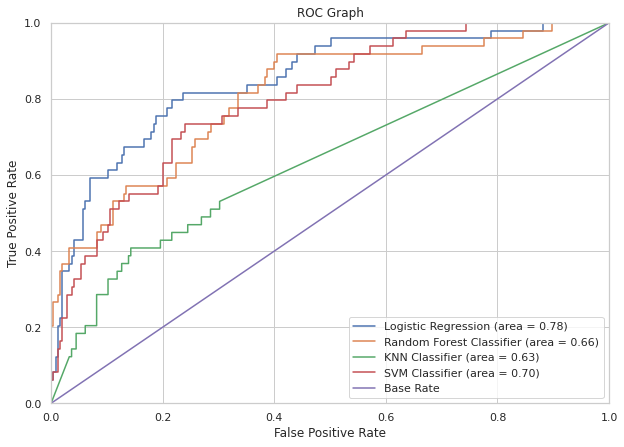

In [111]:
# Create ROC Graph
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rand_fr.predict_proba(X_test)[:,1])
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm.predict_proba(X_test)[:,1])

plt.figure(figsize=(10,7))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % log_reg_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rand_fr_auc)

# Plot KNN ROC
plt.plot(knn_fpr, knn_tpr, label='KNN Classifier (area = %0.2f)' % knn_auc)

# Plot SVM ROC
plt.plot(svm_fpr, svm_tpr, label='SVM Classifier (area = %0.2f)' % svm_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.savefig("improved_roc")
plt.show()

## Random Forest Feature Importance

In [107]:
# helper function to visualize feature importance using random forest
def imp_feat(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}).sort_values('feature_importance', ascending = False)\
                       .reset_index(drop = True)
    return df

def var_imp_plot(imp_feat, title):
    imp_feat.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_feat, orient = 'h', color = 'green')
    plt.title(title, fontsize = 15)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.xlabel(imp_feat.columns[1], fontsize = 10)
    plt.ylabel(imp_feat.columns[0], fontsize = 10)
    plt.tight_layout()

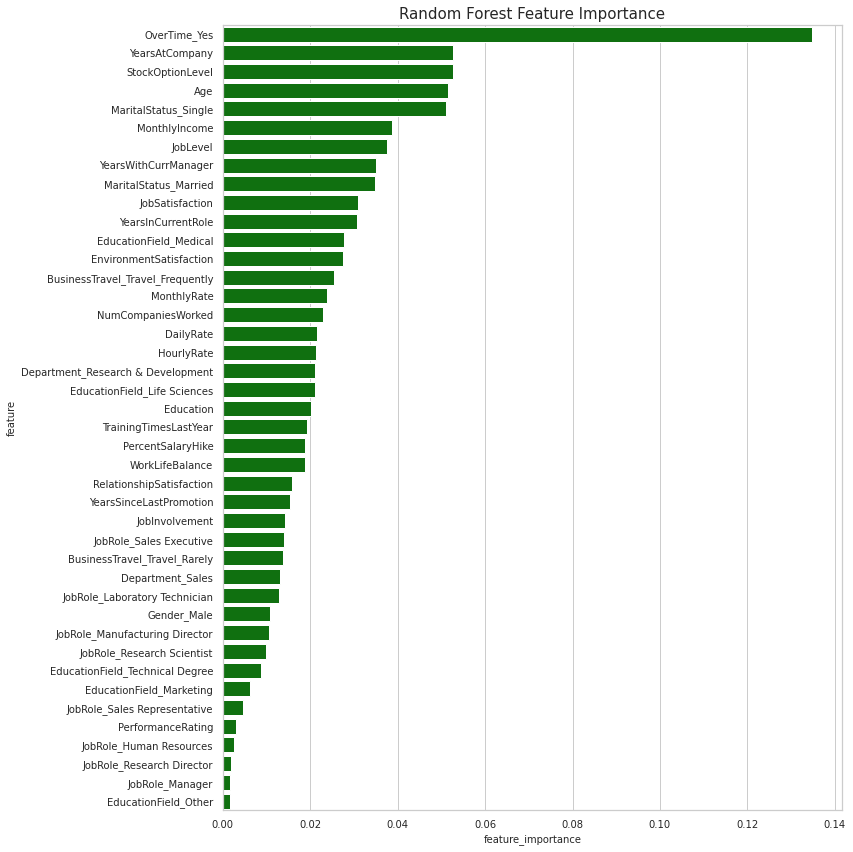

In [112]:
base_imp = imp_feat(X_train.columns, rand_fr.feature_importances_)
plt.figure(figsize=(12, 12))
var_imp_plot(base_imp, 'Random Forest Feature Importance')
plt.savefig("rf_feat_impt")